# Explore individual network dataset

The dataset here should be a lot simpler to work with. Compared to the approach yesterday




In [9]:
import pandas as pd
import numpy as np

# Load the dataset to check its structure
file_path = 'individual_network_1000.csv'
data = pd.read_csv(file_path)

# Display the first few rows and the structure of the dataset
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Associationtype              1000 non-null   object 
 1   Dirbrdname                   1000 non-null   object 
 2   Companyname                  1000 non-null   object 
 3   Directorname                 1000 non-null   object 
 4   Overlapyearstart             1000 non-null   int64  
 5   Overlapyearend               1000 non-null   object 
 6   Role                         1000 non-null   object 
 7   Associatedrole               1000 non-null   object 
 8   Orgtype                      1000 non-null   object 
 9   Dirbrdid                     1000 non-null   int64  
 10  Companyid                    1000 non-null   int64  
 11  Directorid                   1000 non-null   int64  
 12  Roletitle                    1000 non-null   object 
 13  Roleboardposition  

(  Associationtype  Dirbrdname  \
 0      Listed Org  Paul Davis   
 1      Listed Org  Paul Davis   
 2      Listed Org  Paul Davis   
 3      Listed Org  Paul Davis   
 4      Listed Org  Paul Davis   
 
                                          Companyname  Directorname  \
 0  PREMD INC (IMI International Medical Innovatio...   Ron Hosking   
 1          HANFENG EVERGREEN INC (De-listed 06/2014)    Paul Begin   
 2          HANFENG EVERGREEN INC (De-listed 06/2014)   Loudon Owen   
 3          HANFENG EVERGREEN INC (De-listed 06/2014)  David Reburn   
 4          HANFENG EVERGREEN INC (De-listed 06/2014)    Joanne Yan   
 
    Overlapyearstart Overlapyearend                             Role  \
 0              2008           2008         Director - SD (Brd) (SD)   
 1              2009           2011  Independent Director (Brd) (SD)   
 2              2011           2011  Independent Director (Brd) (SD)   
 3              2009           2009  Independent Director (Brd) (SD)   
 4    

In [10]:
# vectorising is possible here and that's it!!

# and it is the same check how it could work to run here!!

In [11]:
df = data

# Normalize director IDs into two columns but treat each as a distinct director
df1 = df[['Dirbrdid', 'Companyid']].rename(columns={'Dirbrdid': 'Director'})
df2 = df[['Directorid', 'Companyid']].rename(columns={'Directorid': 'Director'})

# Combine into a single frame
combined_df = pd.concat([df1, df2])

# Pivot table to get directors as rows and companies as columns
matrix = combined_df.pivot_table(index='Director', columns='Companyid', aggfunc='size', fill_value=0)

# Convert the pivot table into a binary format (presence/absence)
binary_matrix = (matrix > 0).astype(int)

# Compute the adjacency matrix
adj_matrix = binary_matrix.dot(binary_matrix.T)

# Adjust diagonal to zero to avoid self-loops
np.fill_diagonal(adj_matrix.values, 0)

print(adj_matrix)

Director  600      31196    34223    35087    35089    35091    35092    \
Director                                                                  
600             0        1        1        1        1        1        1   
31196           1        0        1        1        1        1        1   
34223           1        1        0        1        1        1        1   
35087           1        1        1        0        1        1        1   
35089           1        1        1        1        0        1        1   
...           ...      ...      ...      ...      ...      ...      ...   
2763004         0        0        0        0        0        0        0   
2774239         0        0        0        0        0        0        0   
2775623         0        0        0        0        0        0        0   
2777033         0        0        0        0        0        0        0   
2777860         0        0        0        0        0        0        0   

Director  35094    35096

In [12]:
combined_df

,Director,Companyid
0,1000002,15646
1,1000002,731879
2,1000002,731879
3,1000002,731879
4,1000002,731879
...,...,...
995,1343589,4504
996,1343803,4504
997,1344384,4504
998,1344473,4504


# Full Data workflow

In [3]:
# years of overlap should work!!

import pandas as pd

In [4]:
individual_full = pd.read_csv("../2.Initial_Graph_Building/NEW_boardex_indiv_dataset.csv", index_col=0)

In [5]:
individual_full.columns

Index(['associationtype', 'dirbrdname', 'companyname', 'directorname',
       'overlapyearstart', 'overlapyearend', 'role', 'associatedrole',
       'orgtype', 'dirbrdid', 'companyid', 'directorid', 'roletitle',
       'roleboardposition', 'roleedflag', 'associatedroletitle',
       'associatedroleboardposition', 'associatedroleedflag',
       'overlapyearstart_int', 'overlapyearend_int'],
      dtype='object')

In [6]:
# filter out the details here for the workflow

In [23]:
filtered_data = individual_full[['dirbrdid', 'companyid', 'directorid', 'overlapyearstart', 'overlapyearend' ]].drop_duplicates()

In [24]:
filtered_data['overlapyearend'].replace("Curr", 2024)
filtered_data['overlapyearend'] = pd.to_numeric(filtered_data['overlapyearend'], errors='coerce')

In [25]:
year = 2022

In [26]:
graph_simplified_df = filtered_data[ (year >= filtered_data['overlapyearstart']) & (year <= filtered_data['overlapyearend'])]

In [33]:
graph_simplified_df.directorid

3         2583997.0
4         2703989.0
6         2703997.0
8         2704021.0
14        2119563.0
            ...    
357393    1140278.0
357413    1140278.0
357431    1140278.0
357449    1140278.0
357486    1140278.0
Name: directorid, Length: 446508, dtype: float64

In [34]:
graph_simplified_df.dirbrdid

3         1481217.0
4         1481217.0
6         1481217.0
8         1481217.0
14        1481217.0
            ...    
357393    2466060.0
357413    1248606.0
357431    1786476.0
357449     104992.0
357486     346277.0
Name: dirbrdid, Length: 446508, dtype: float64

In the code check for the denseness below

In [27]:
# df = graph_simplified_df

# # Normalize director IDs into two columns but treat each as a distinct director
# df1 = df[['dirbrdid', 'companyid']].rename(columns={'dirbrdid': 'director'})
# df2 = df[['directorid', 'companyid']].rename(columns={'directorid': 'director'})

# # Combine into a single frame
# combined_df = pd.concat([df1, df2])

# # Pivot table to get directors as rows and companies as columns
# matrix = combined_df.pivot_table(index='director', columns='companyid', aggfunc='size', fill_value=0)

# # Convert the pivot table into a binary format (presence/absence)
# binary_matrix = (matrix > 0).astype(int)

# # Compute the adjacency matrix
# adj_matrix = binary_matrix.dot(binary_matrix.T)

# # Adjust diagonal to zero to avoid self-loops
# np.fill_diagonal(adj_matrix.values, 0)

# print(adj_matrix)

In [28]:
# df = graph_simplified_df  # assuming 'graph_simplified_df' is previously defined

# # Normalize director IDs into two columns but treat each as a distinct director
# df1 = df[['dirbrdid', 'companyid']].rename(columns={'dirbrdid': 'director'})
# df2 = df[['directorid', 'companyid']].rename(columns={'directorid': 'director'})

# # Combine into a single frame
# combined_df = pd.concat([df1, df2])

# # Pivot table to get directors as rows and companies as columns
# matrix = combined_df.pivot_table(index='director', columns='companyid', aggfunc='size', fill_value=0)

# # Convert the pivot table into a binary format (presence/absence)
# binary_matrix = (matrix > 0).astype(int)

# # Compute the adjacency matrix
# adj_matrix = binary_matrix.dot(binary_matrix.T)

# # Convert the product matrix to binary to reflect just the connection (not the number of paths)
# adj_matrix = (adj_matrix > 0).astype(int)

# # Adjust diagonal to zero to avoid self-loops
# np.fill_diagonal(adj_matrix.values, 0)

# print(adj_matrix)

In [29]:
# import pandas as pd
# import numpy as np
# from scipy import sparse

# df = graph_simplified_df  # assuming 'graph_simplified_df' is previously defined

# # Normalize director IDs into two columns but treat each as a distinct director
# df1 = df[['dirbrdid', 'companyid']].rename(columns={'dirbrdid': 'director'})
# df2 = df[['directorid', 'companyid']].rename(columns={'directorid': 'director'})

# # Combine into a single frame
# combined_df = pd.concat([df1, df2])

# # Create a sparse matrix where rows are directors and columns are companies
# rows = pd.factorize(combined_df['director'])[0]  # Convert director names to indices
# cols = pd.factorize(combined_df['companyid'])[0]  # Convert company IDs to indices

# # Create a sparse matrix with shape as maximum indices + 1 (ensuring all are included)
# data = np.ones(len(combined_df), dtype=int)  # Use 1 to mark presence
# binary_matrix = sparse.coo_matrix((data, (rows, cols)), shape=(len(np.unique(rows)), len(np.unique(cols))))

# # Compute the adjacency matrix using dot product and convert to CSR format for efficiency
# adj_matrix = binary_matrix.dot(binary_matrix.transpose()).tocsr()

# # Convert non-zero elements to 1 (making the adjacency matrix binary)
# adj_matrix.data = np.ones_like(adj_matrix.data)

# # Remove self-loops by setting diagonal to zero
# adj_matrix.setdiag(0)

# # Convert back to a dense format for printing, if necessary (can be omitted for very large matrices)
# dense_adj_matrix = adj_matrix.todense()

# print(dense_adj_matrix)


Sparse matrix increases performance to create the matrix, for the algorithms - I suppose using the 

In [30]:
import pandas as pd
import numpy as np
from scipy import sparse

df = graph_simplified_df  # assuming 'graph_simplified_df' is previously defined

# Normalize director IDs into two columns but treat each as a distinct director
df1 = df[['dirbrdid', 'companyid']].rename(columns={'dirbrdid': 'director'})
df2 = df[['directorid', 'companyid']].rename(columns={'directorid': 'director'})

# Combine into a single frame
combined_df = pd.concat([df1, df2])

# Create a sparse matrix where rows are directors and columns are companies
director_indices, unique_directors = pd.factorize(combined_df['director'])  # Convert director names to indices and capture unique directors
company_indices, unique_companies = pd.factorize(combined_df['companyid'])  # Convert company IDs to indices and capture unique companies

# Create a sparse matrix with shape as maximum indices + 1 (ensuring all are included)
data = np.ones(len(combined_df), dtype=int)  # Use 1 to mark presence
binary_matrix = sparse.coo_matrix((data, (director_indices, company_indices)), shape=(len(unique_directors), len(unique_companies)))

# Compute the adjacency matrix using dot product and convert to CSR format for efficiency
adj_matrix = binary_matrix.dot(binary_matrix.transpose()).tocsr()

# Convert non-zero elements to 1 (making the adjacency matrix binary)
adj_matrix.data = np.ones_like(adj_matrix.data)

# Remove self-loops by setting diagonal to zero
adj_matrix.setdiag(0)

# Convert to dense format
dense_adj_matrix = adj_matrix.todense()

# Dictionary to map row indices back to director IDs
index_to_director = {i: unique_directors[i] for i in range(len(unique_directors))}

# Create a DataFrame with the dense adjacency matrix, labeled by director IDs
adjacency_df = pd.DataFrame(dense_adj_matrix, index=unique_directors, columns=unique_directors)

# Print the DataFrame
print(adjacency_df)


           1481217.0  1884448.0  2477512.0  2583997.0  2592541.0  2703989.0  \
1481217.0          0          1          1          1          1          1   
1884448.0          1          0          1          1          1          1   
2477512.0          1          1          0          1          1          1   
2583997.0          1          1          1          0          1          1   
2592541.0          1          1          1          1          0          1   
...              ...        ...        ...        ...        ...        ...   
1623439.0          0          0          0          0          0          0   
2579730.0          0          0          0          0          0          0   
2579723.0          0          0          0          0          0          0   
2637683.0          0          0          0          0          0          0   
2421957.0          0          0          0          0          0          0   

           2703992.0  2703997.0  2704016.0  2704021

In [35]:
adjacency_df.columns.sort_values()

Index([    826.0,    1026.0,    1032.0,    2415.0,    2783.0,    3298.0,
          3597.0,    3637.0,    5613.0,    6379.0,
       ...
       2856676.0, 2856974.0, 2857074.0, 2860539.0, 2861190.0, 2862218.0,
       2862220.0, 2862221.0, 2862285.0, 2863373.0],
      dtype='float64', length=15676)

In [31]:
dense_adj_matrix.shape # do sparse matrices here for the workflow

# faster operation for details, and overall less to batch so save e

(15676, 15676)

Check that these values are correct later!! Here essentially everything is done unsorted - can reprompt if it is wrong.

Operations are much faster this way due to memory and so on

faster operation for details, and overall less to batch so save space and processing.

**Important for sparse matrices such as graphs** 

Add this in the report later!! At least for the adjacency matrix

Even faster when you create the graph!! Sparse nature is something discussed by Nick before, so remember this!! Nice trick!!


**Community detection workflow**

See some stats are slow - so in the below like in UDA and as suggested in GPT use a GPU cuDNN graph workflow for that, as additional resources for analysis for the graph workflow.

In [24]:
adj_matrix.to_csv("individual_adj_2022.csv") # 1 minute to write here, try to write to wsl to speed up these later.

In [ ]:
adj_matrix

In [25]:
adj_matrix[(adj_matrix != 0).any(axis=1)]

director,826.0,1026.0,1032.0,2415.0,2783.0,3298.0,3597.0,3637.0,5613.0,6379.0,...,2856676.0,2856974.0,2857074.0,2860539.0,2861190.0,2862218.0,2862220.0,2862221.0,2862285.0,2863373.0
director,,,,,,,,,,,,,,,,,,,,,
826.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1026.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1032.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2415.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2783.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862218.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2862220.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2862221.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
# takes 6 minutes to run each try the sparse implementation below

In [ ]:
# if works can then convert to the network data later and get the centrality measures for workflow

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

In [42]:
G = nx.from_pandas_adjacency(adjacency_df)
print(G)

# loading it is fast though and can check it

Graph with 15676 nodes and 315005 edges


In [43]:
# # Position nodes using the spring layout
# pos = nx.spring_layout(G)

# # Draw the graph
# nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)

# # Show the plot
# plt.show()

# Graph and density graph details



In [44]:
import networkx as nx

In [45]:
density = nx.density(G)
print("Density of the graph:", density)


Density of the graph: 0.0025639209950460134


In [46]:
clustering = nx.clustering(G)
print("Local clustering for each node:", clustering)


 # id details for each for director for this.

Local clustering for each node: {550152.0: 1.0, 1668153.0: 1.0, 1939940.0: 1.0, 1998361.0: 0.5313131313131313, 2811982.0: 1.0, 2424196.0: 1.0, 836758.0: 1.0, 104651.0: 1.0, 2317162.0: 1.0, 2251157.0: 1.0, 1886568.0: 0.48936170212765956, 41136.0: 0.5305125558995528, 517429.0: 1.0, 1058460.0: 1.0, 2621124.0: 0.4946938775510204, 2159297.0: 1.0, 2753985.0: 1.0, 756111.0: 1.0, 2480514.0: 1.0, 2625766.0: 1.0, 1491787.0: 1.0, 1126183.0: 1.0, 1919758.0: 1.0, 2613155.0: 1.0, 2175832.0: 1.0, 2446191.0: 1.0, 1906820.0: 1.0, 497186.0: 1.0, 370587.0: 1.0, 2155942.0: 1.0, 1827880.0: 1.0, 2229263.0: 1.0, 2524501.0: 1.0, 1325150.0: 1.0, 2421957.0: 1.0, 2637683.0: 1.0, 2579723.0: 1.0, 2579730.0: 1.0, 1623439.0: 1.0, 2557601.0: 1.0, 2555507.0: 1.0, 2555497.0: 1.0, 1040042.0: 1.0, 2552469.0: 1.0, 2602889.0: 1.0, 1394703.0: 1.0, 2396312.0: 1.0, 486441.0: 1.0, 1984066.0: 1.0, 2028048.0: 1.0, 1543267.0: 1.0, 2532468.0: 1.0, 2035539.0: 1.0, 598735.0: 1.0, 1941719.0: 1.0, 1936470.0: 1.0, 1956461.0: 1.0, 26194

In [47]:
degree_centrality = nx.degree_centrality(G)
print("Degree centrality for each node:", degree_centrality)


Degree centrality for each node: {550152.0: 0.0016586921850079747, 1668153.0: 0.0011483253588516747, 1939940.0: 0.0015311004784688996, 1998361.0: 0.002870813397129187, 2811982.0: 0.012567783094098884, 2424196.0: 0.003700159489633174, 836758.0: 0.0014035087719298247, 104651.0: 0.0013397129186602872, 2317162.0: 0.0015311004784688996, 2251157.0: 0.002232854864433812, 1886568.0: 0.002998405103668262, 41136.0: 0.01090909090909091, 517429.0: 0.0010845295055821372, 1058460.0: 0.002360446570972887, 2621124.0: 0.0031897926634768745, 2159297.0: 0.0015311004784688996, 2753985.0: 0.0021690590111642745, 756111.0: 0.0007655502392344498, 2480514.0: 0.0014035087719298247, 2625766.0: 0.0024242424242424247, 1491787.0: 0.0026794258373205745, 1126183.0: 0.001977671451355662, 1919758.0: 0.0007017543859649123, 2613155.0: 0.0020414673046251996, 2175832.0: 0.001977671451355662, 2446191.0: 0.0017224880382775121, 1906820.0: 0.0020414673046251996, 497186.0: 0.0021052631578947372, 370587.0: 0.0012121212121212123,

In [48]:
# more costly to run - this is quite costly as with community detection approaches

# too much to run that's a problem - tried 

betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness centrality for each node:", betweenness_centrality)


KeyboardInterrupt: 

In [49]:
weights = [G[u][v]['weight'] for u, v in G.edges()]

In [50]:
# gpu enabled approaches may be needed for the other principles

In [51]:
max(weights) # 5 common directors so this is fine.

1

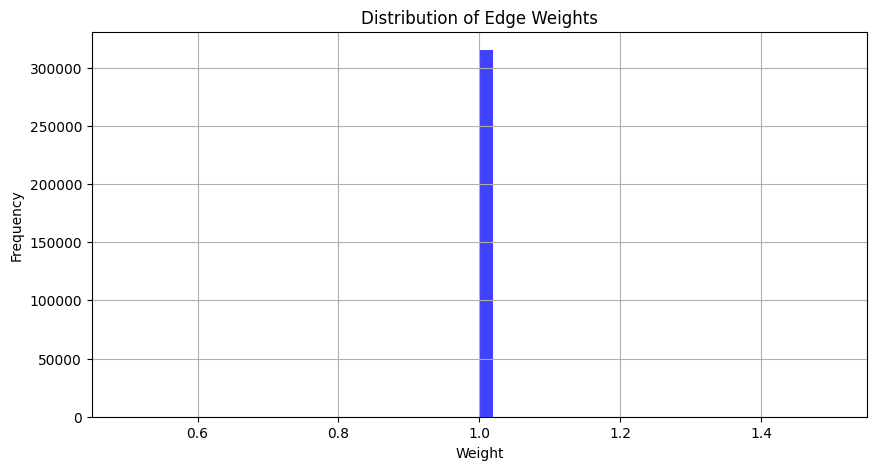

In [52]:
import matplotlib.pyplot as plt

# Histogram of the weights
plt.figure(figsize=(10, 5))
plt.hist(weights, bins=50, alpha=0.75, color='blue')
plt.title('Distribution of Edge Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Shows it is very sparse which is what we expect.

Try to make this faster with sparse representations here as needed.

Knowledge from before is used to get the sparse representation.